http://www.aishack.in/tutorials/generating-multivariate-gaussian-random/

In [4]:
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
def get_gaussian_random():
    m = 0
    while m == 0:
        m = round(np.random.random() * 100)
    
    numbers = np.random.random(int(m)) # m random numbers
    summation = float(np.sum(numbers)) # sum, central limit theorem
    gaussian = (summation - m/2) / math.sqrt(m/12.0) # put numbers together and return gaussian
    return gaussian

In [13]:
def generate_known_gaussian(dimensions):
    count = 1000

    ret = []
    for i in range(count):
        current_vector = []
        for j in range(dimensions):
            g = get_gaussian_random()
            current_vector.append(g)

        ret.append( tuple(current_vector) )

    return ret

In [14]:
def main():
    known = generate_known_gaussian(2)
    
    target_mean = np.matrix([ [1.0], [5.0]])
    
    target_cov  = np.matrix([[  1.0, 0.7], 
                             [  0.7, 0.6]])

    [eigenvalues, eigenvectors] = np.linalg.eig(target_cov)
    
    l = np.matrix(np.diag(np.sqrt(eigenvalues)))
    Q = np.matrix(eigenvectors) * l
    
    x1_tweaked = []
    x2_tweaked = []
    tweaked_all = []
    
    for i, j in known:
        original = np.matrix( [[i], [j]]).copy()
        tweaked = (Q * original) + target_mean
        x1_tweaked.append(float(tweaked[0]))
        x2_tweaked.append(float(tweaked[1]))
        tweaked_all.append( tweaked )
    plt.scatter(x1_tweaked, x2_tweaked)
    plt.axis([-6, 10, -6, 10])
    plt.hlines(0, -6, 10)
    plt.vlines(0, -6, 10)
    plt.show()

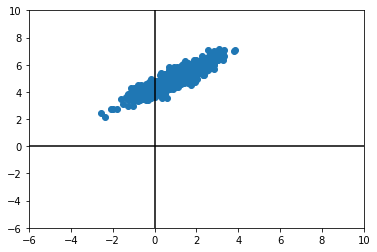

In [16]:
if __name__ == "__main__":
    main()
        